<a href="https://colab.research.google.com/github/agt-morgu5/Olario/blob/main/Tratando_dados_e_primeiros_gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados.head()


Rua              Bairro     Cidade  Metragem  \
0           Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1  Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                 Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3                             NaN      Jardim Morumbi  São Paulo       310   
4        Rua Tobias Barreto, 195                Mooca  São Paulo       100   

   Quartos  Banheiros  Vagas         Valor  
0        4          8      6  R$ 7.000.000  
1        4          4      4  R$ 3.700.000  
2        4          3      2    R$ 380.000  
3        3          2      4    R$ 685.000  
4        3          2      2    R$ 540.000

In [8]:
dados ["Valor"][0]

'R$ 7.000.000'

In [9]:
dados ["Valor"][0].split()

['R$', '7.000.000']

In [11]:
dados.sample(10)

Rua                         Bairro  \
4366                               NaN                  Jardim Europa   
5496              Avenida Piassanguaba              Planalto Paulista   
557             Rua Aleixo Jorge, 190                          Sumaré   
8062                        Rua Veneza                Jardim Paulista   
2838             Rua Senador João Lira                       Pacaembu   
6395              Rua Fonseca da Costa                Bosque da Saúde   
1139         Rua Mateus Mendes Pereira  Jardim Nossa Senhora do Carmo   
5807  Rua Deputado João Bravo Caldeira              Planalto Paulista   
6859                               NaN                Jardim Paulista   
7645    Avenida Manoel dos Reis Araújo               Jardim Marajoara   

         Cidade  Metragem  Quartos  Banheiros  Vagas  \
4366  São Paulo       340        3          3     10   
5496  São Paulo       400        3          4      6   
557   São Paulo       150        4          1      2   
8062  São Paulo       455        3          1      2   
2838  São Paulo       300        4          4      3   
6395  São Paulo       326        4          2      3   
1139  São Paulo       102        3          2      2   
5807  São Paulo       280        3          3      3   
6859  São Paulo       425        4          4      2   
7645  São Paulo       342        5          5      8   

                                      Valor  
4366  R$ 30.000\n                      /Mês  
5496                           R$ 2.210.000  
557                            R$ 1.500.000  
8062  R$ 15.000\n                      /Mês  
2838                           R$ 2.500.000  
6395                             R$ 980.000  
1139                             R$ 450.000  
5807                             R$ 850.000  
6859                           R$ 3.800.000  
7645  R$ 10.000\n                      /Mês

In [13]:
dados["Valor"].str.split(expand = True)

0          1     2
0      R$  7.000.000  None
1      R$  3.700.000  None
2      R$    380.000  None
3      R$    685.000  None
4      R$    540.000  None
...    ..        ...   ...
10003  R$    665.000  None
10004  R$  2.300.000  None
10005  R$  1.050.000  None
10006  R$      2.200  /Mês
10007  R$    270.000  None

[10008 rows x 3 columns]

In [16]:
len(dados["Valor"].str.split(expand = True)[1].unique())

1038

In [17]:
dados["Valor"].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [18]:
dados [["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados.head()

Rua              Bairro     Cidade  Metragem  \
0           Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1  Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                 Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3                             NaN      Jardim Morumbi  São Paulo       310   
4        Rua Tobias Barreto, 195                Mooca  São Paulo       100   

   Quartos  Banheiros  Vagas         Valor Moeda Valor_anuncio Tipo_anuncio  
0        4          8      6  R$ 7.000.000    R$     7.000.000         None  
1        4          4      4  R$ 3.700.000    R$     3.700.000         None  
2        4          3      2    R$ 380.000    R$       380.000         None  
3        3          2      4    R$ 685.000    R$       685.000         None  
4        3          2      2    R$ 540.000    R$       540.000         None

In [20]:
dados [dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()

array([None], dtype=object)

In [22]:
dados_vendas = dados [dados["Tipo_anuncio"].isnull()]
dados_vendas

Rua              Bairro     Cidade  \
0               Avenida Itacira, 255    Planalto Paulista  São Paulo   
1      Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo   
2                     Rua Alba Valdez     Jardim Reimberg  São Paulo   
3                                 NaN      Jardim Morumbi  São Paulo   
4            Rua Tobias Barreto, 195                Mooca  São Paulo   
...                               ...                 ...        ...   
10002                   Avenida Odila   Planalto Paulista  São Paulo   
10003                      Rua Tapuçu          Vila Sofia  São Paulo   
10004                   Rua Guararema     Bosque da Saúde  São Paulo   
10005               Rua Estero Belaco       Vila da Saúde  São Paulo   
10007      Rua Barão de Tramandaí, 0          Vila Alpina  São Paulo   

       Metragem  Quartos  Banheiros  Vagas         Valor Moeda Valor_anuncio  \
0          1000        4          8      6  R$ 7.000.000    R$     7.000.000   
1           496        4          4      4  R$ 3.700.000    R$     3.700.000   
2           125        4          3      2    R$ 380.000    R$       380.000   
3           310        3          2      4    R$ 685.000    R$       685.000   
4           100        3          2      2    R$ 540.000    R$       540.000   
...         ...      ...        ...    ...           ...   ...           ...   
10002       267        3          6      4  R$ 1.500.000    R$     1.500.000   
10003        95        2          2      2    R$ 665.000    R$       665.000   
10004       605        8          7      5  R$ 2.300.000    R$     2.300.000   
10005       205        3          3      6  R$ 1.050.000    R$     1.050.000   
10007       122        3          2      2    R$ 270.000    R$       270.000   

      Tipo_anuncio  
0             None  
1             None  
2             None  
3             None  
4             None  
...            ...  
10002         None  
10003         None  
10004         None  
10005         None  
10007         None  

[9156 rows x 11 columns]

In [23]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [31]:
dados_vendas ["Valor_anuncio"].str.replace(".", "").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [33]:
dados_vendas ["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [34]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


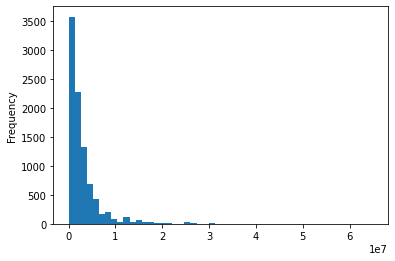

In [36]:
dados_vendas ["Valor_anuncio_float"].plot.hist(bins = 50)

In [40]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

dados_vendas.describe(include = "all")

Rua             Bairro     Cidade  Metragem  Quartos  \
count                6107               9146       9156   9156.00  9156.00   
unique               3006                697          1       NaN      NaN   
top     Rua Alberto Faria  Alto de Pinheiros  São Paulo       NaN      NaN   
freq                   24                369       9156       NaN      NaN   
mean                  NaN                NaN        NaN    434.42     3.45   
std                   NaN                NaN        NaN   7856.42     1.05   
min                   NaN                NaN        NaN     10.00     1.00   
25%                   NaN                NaN        NaN    168.00     3.00   
50%                   NaN                NaN        NaN    276.00     3.00   
75%                   NaN                NaN        NaN    450.00     4.00   
max                   NaN                NaN        NaN 750000.00    16.00   

        Banheiros   Vagas         Valor Moeda Valor_anuncio Tipo_anuncio  \
count     9156.00 9156.00          9156  9156          9156            0   
unique        NaN     NaN           939     1           939            0   
top           NaN     NaN  R$ 2.500.000    R$     2.500.000          NaN   
freq          NaN     NaN           182  9156           182          NaN   
mean         3.80    3.96           NaN   NaN           NaN          NaN   
std          1.97    2.60           NaN   NaN           NaN          NaN   
min          1.00    1.00           NaN   NaN           NaN          NaN   
25%          2.00    2.00           NaN   NaN           NaN          NaN   
50%          4.00    4.00           NaN   NaN           NaN          NaN   
75%          5.00    5.00           NaN   NaN           NaN          NaN   
max         40.00   50.00           NaN   NaN           NaN          NaN   

        Valor_anuncio_float  
count               9156.00  
unique                  NaN  
top                     NaN  
freq                    NaN  
mean             3052202.96  
std              3944208.19  
min                13000.00  
25%               890000.00  
50%              1800000.00  
75%              3500000.00  
max             65000000.00

In [41]:
dados_vendas[["Rua", "Bairro", "Cidade"]].describe()

Rua             Bairro     Cidade
count                6107               9146       9156
unique               3006                697          1
top     Rua Alberto Faria  Alto de Pinheiros  São Paulo
freq                   24                369       9156

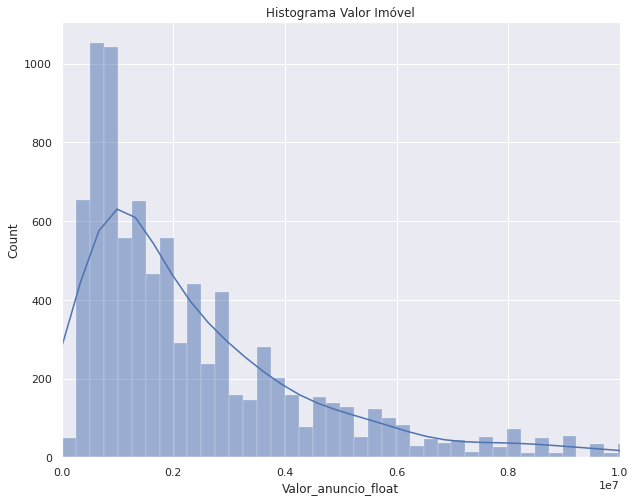

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True)
plt.xlim((-50, 10000000))
ax.set_title("Histograma Valor Imóvel")
plt.show()